# RED WINE QUALITY PREDICTION

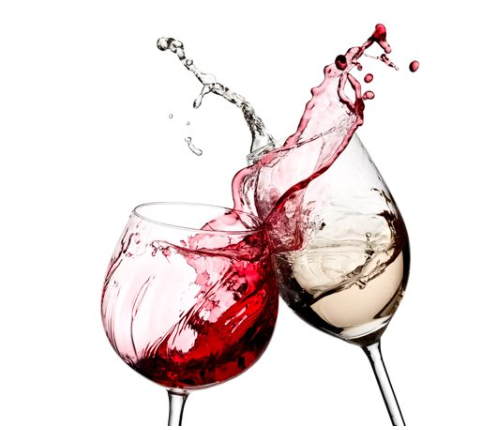

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

**LOADING DATASET**

In [ ]:
wine=pd.read_csv("/content/winequality-red.csv")
wine.sample(25)

In [ ]:
# number of rows & columns in the dataset
wine.shape

(1599, 12)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**DESCRIPTION**

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**FINDING NULL VALUES**

In [ ]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


**DATA ANALYSIS**

Countplot

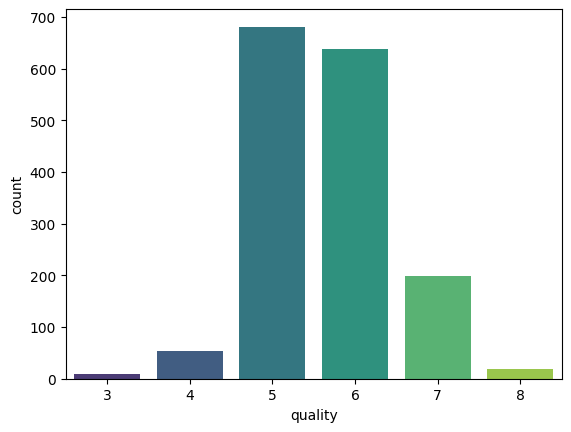

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'wine' is your DataFrame and 'quality' is a column in it
sns.countplot(x='quality', data=wine, palette='viridis')  # You can choose a different palette
plt.show()



<Axes: xlabel='quality', ylabel='volatile acidity'>

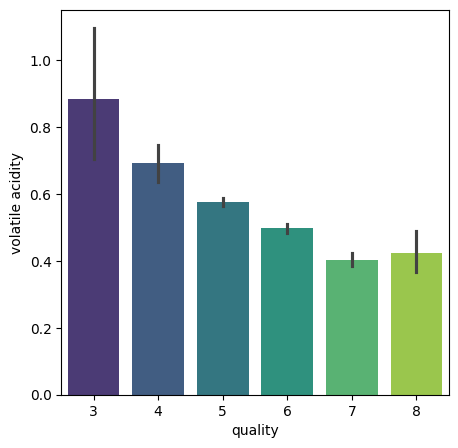

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine, palette='viridis')

<Axes: xlabel='quality', ylabel='citric acid'>

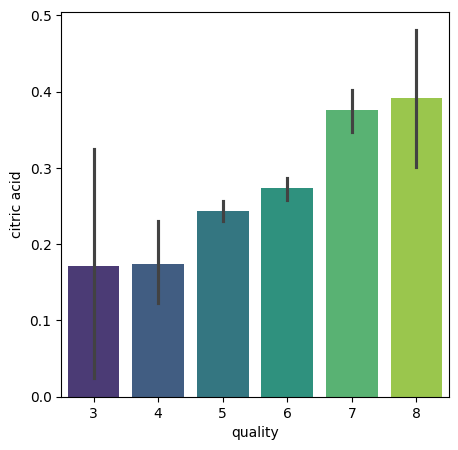

In [ ]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine, palette='viridis')

fixed acidity              Axes(0.125,0.712609;0.168478x0.167391)
volatile acidity        Axes(0.327174,0.712609;0.168478x0.167391)
citric acid             Axes(0.529348,0.712609;0.168478x0.167391)
residual sugar          Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                  Axes(0.125,0.511739;0.168478x0.167391)
free sulfur dioxide     Axes(0.327174,0.511739;0.168478x0.167391)
total sulfur dioxide    Axes(0.529348,0.511739;0.168478x0.167391)
density                 Axes(0.731522,0.511739;0.168478x0.167391)
pH                          Axes(0.125,0.31087;0.168478x0.167391)
sulphates                Axes(0.327174,0.31087;0.168478x0.167391)
alcohol                  Axes(0.529348,0.31087;0.168478x0.167391)
quality                  Axes(0.731522,0.31087;0.168478x0.167391)
dtype: object

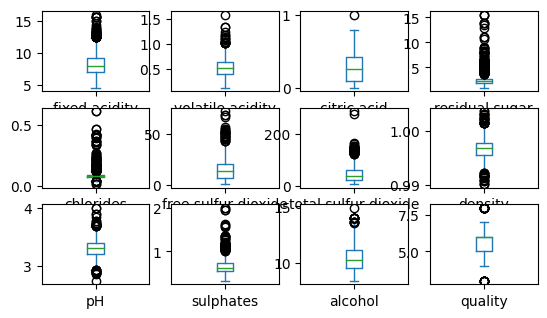

In [ ]:
wine.plot(kind='box', subplots= True, layout= (4,4),sharex= False)

<Axes: >

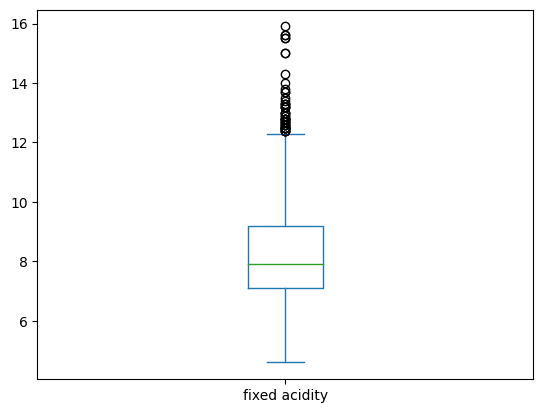

In [ ]:
wine['fixed acidity'].plot(kind = 'box')

Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

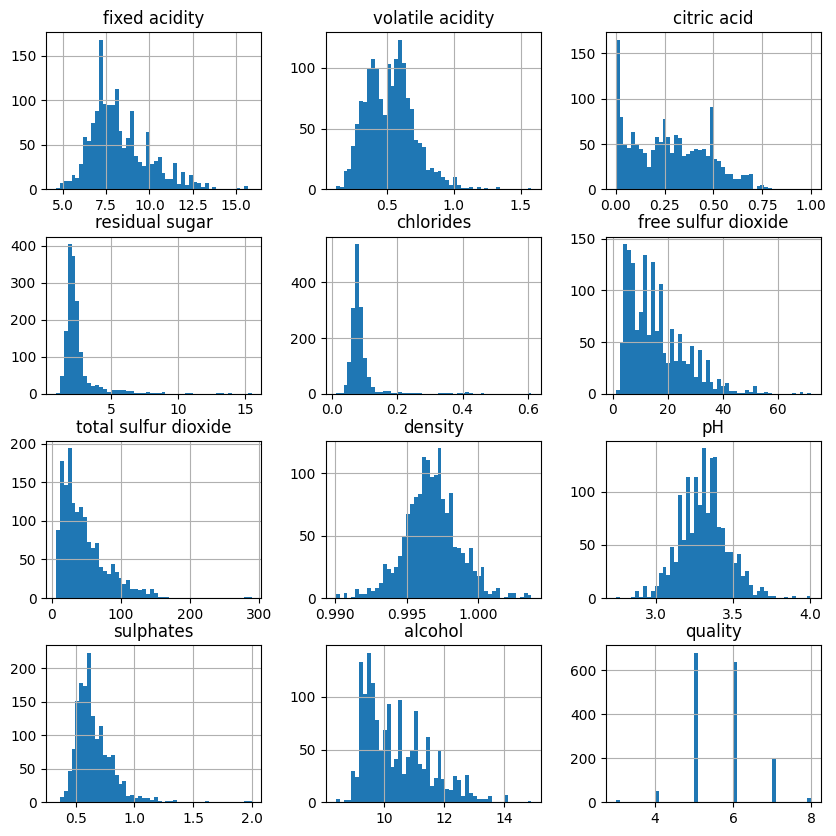

In [ ]:
wine.hist(figsize=(10,10),bins=50)
plt.show

**Correlation**

Positive Correlation

Negative Correlation

In [ ]:
correlation = wine.corr()

<Axes: >

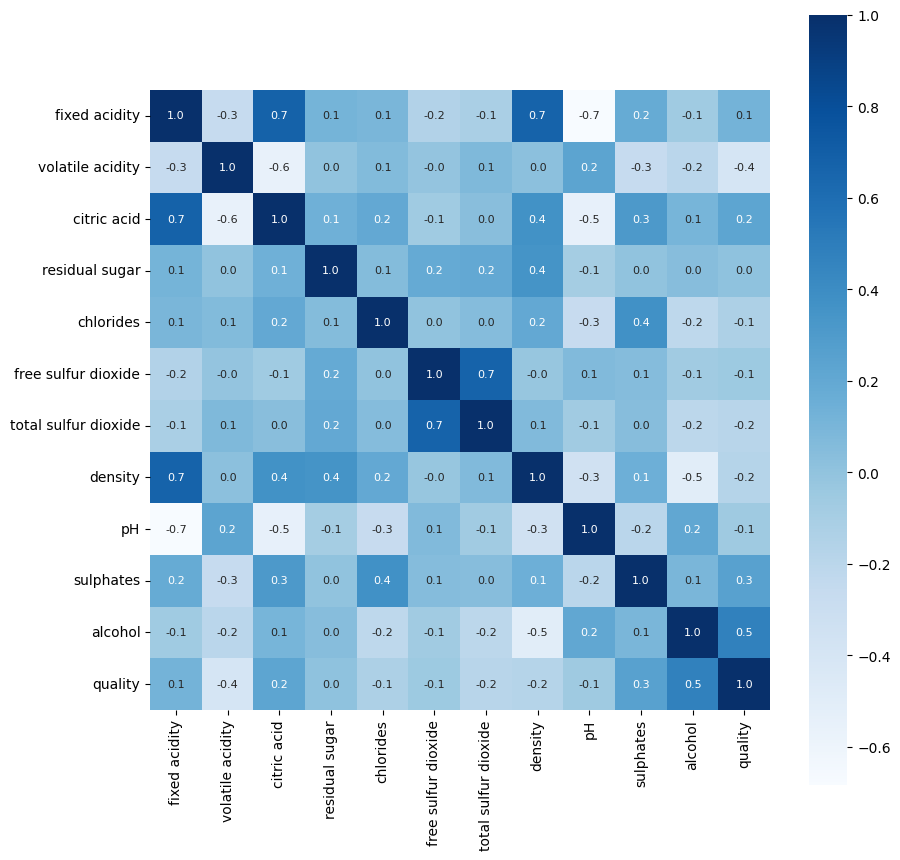

In [ ]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

**FEATURE EXTRACTION**

In [ ]:
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6
1180,8.2,0.35,0.33,2.4,0.076,11.0,47.0,0.99599,3.27,0.81,11.0,6
675,9.3,0.41,0.39,2.2,0.064,12.0,31.0,0.99840,3.26,0.65,10.2,5
960,8.5,0.47,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1,6
1504,7.5,0.38,0.57,2.3,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6


**DATA PREPROCESSING**

In [ ]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
#if wine quality is equal to or greater than 7, then consider as a good quality wine
wine['goodquality']= [ 1 if x>= 7 else 0 for x in wine['quality']]
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
344,11.9,0.57,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.7,6,0
1574,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6,0
1196,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,6,0
1138,7.5,0.41,0.15,3.7,0.104,29.0,94.0,0.99786,3.14,0.58,9.1,5,0
1133,7.2,0.48,0.07,5.5,0.089,10.0,18.0,0.99684,3.37,0.68,11.2,7,1


In [ ]:
# seprt dpnded and indpnded vrbles
x= wine.drop(['quality','goodquality'], axis=1)
y= wine['goodquality']

In [ ]:
#total number good vs bad wines sample
wine['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [ ]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


**FEATURE IMPORTANCE**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
Classifier = ExtraTreesClassifier()
Classifier.fit(x,y)
score= Classifier.feature_importances_
print(score)

[0.07834499 0.10116007 0.09629604 0.07376802 0.06740412 0.06854698
 0.08017483 0.0856351  0.06964807 0.10878774 0.17023404]


splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=7)

In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


**Result**

In [ ]:
model_res=pd.DataFrame(columns=['model','score'])

**Logistic Regression**

In [ ]:

from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
#accrcy score(y_test, y_pred)
model_res.loc[len(model_res)] =  ['LogisticRegression', accuracy_score(y_test, y_pred)]
model_res


,model,score
0,LogisticRegression,0.871875


**Using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score
#accrcy score(y_test, y_pred)
model_res.loc[len(model_res)] =  ['KNeighborsClassifier', accuracy_score(y_test, y_pred)]
model_res

,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500


**Using SVC**

In [ ]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score
#accrcy score(y_test, y_pred)
model_res.loc[len(model_res)] =  ['SVC', accuracy_score(y_test, y_pred)]
model_res

,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500
2,SVC,0.871875


**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='entropy', random_state=7)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:, ", accuracy_score(y_test, y_pred))
model_res.loc[len(model_res)] =  ['DecisionTreeClassifier', accuracy_score(y_test, y_pred)]
model_res

Accuracy Score:,  0.884375


,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500
2,SVC,0.871875
3,DecisionTreeClassifier,0.884375


In [ ]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:, ", accuracy_score(y_test, y_pred))
model_res.loc[len(model_res)] =  ['GaussianNB', accuracy_score(y_test, y_pred)]
model_res

Accuracy Score:,  0.840625


,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500
2,SVC,0.871875
3,DecisionTreeClassifier,0.884375
4,GaussianNB,0.840625


In [ ]:
import xgboost as xgb
model= xgb.XGBClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
model_res.loc[len(model_res)] =  ['XGBClassifier', accuracy_score(y_test, y_pred)]
model_res

Accuracy Score:  0.90625


,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500
2,SVC,0.871875
3,DecisionTreeClassifier,0.884375
4,GaussianNB,0.840625
5,XGBClassifier,0.906250


Model Training:

**Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

Model Evaluation

In [ ]:
# accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9125


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy : ', test_data_accuracy)
model_res.loc[len(model_res)] =  ['RandomForestClassifier()',  test_data_accuracy]
model_res

Accuracy :  0.9125


,model,score
0,LogisticRegression,0.871875
1,KNeighborsClassifier,0.887500
2,SVC,0.871875
3,DecisionTreeClassifier,0.884375
4,GaussianNB,0.840625
5,XGBClassifier,0.906250
6,RandomForestClassifier(),0.912500


In [ ]:
model_res=model_res.sort_values(by='score', ascending=False)
model_res

,model,score
6,RandomForestClassifier(),0.912500
5,XGBClassifier,0.906250
1,KNeighborsClassifier,0.887500
3,DecisionTreeClassifier,0.884375
0,LogisticRegression,0.871875
2,SVC,0.871875
4,GaussianNB,0.840625


**Building a Predictive System**

In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
